# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = ""
COLLABORATORS = ""

---

## Zestaw zadań 9: Analiza danych przestrzennych z wykorzystaniem pakietów GeoPandas i PySAL (część 3)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import libpysal as ps
import pointpats as pp

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
def point_count_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    counts: Series
        Seria Pandas zawierająca liczbą punktów przypisanych do każdego z podobszarów.
    """
    # YOUR CODE HERE
    
    iteracja = len(subregions)
    lista = []
    for i in range(iteracja):
        true_or_false = points.within(subregions.iat[i,1])
        suma_prawd = sum(true_or_false)
        lista.append(suma_prawd)
    return lista

    #raise NotImplementedError()

def intensity_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    intensity: Series
        Seria Pandas zawierająca intensywność przypisaną do każdego z podobszarów.
    """
    # YOUR CODE HERE
    intensywnosc = point_count_on_subregions(points, subregions) / subregions.area
    return intensywnosc
#raise NotImplementedError()

#### UWAGA!
Znaczna część przykładów i dokumentacji modułów wchodzących w skład pakietu pysal dostępna w internecie nie dotyczny ich najnowszych wersji.
Z tego powodu lepiej jest zdobywać informacje na temat wykorzystywanych modułów, klas i funkcji z wykorzystaniem funkcji help(), np.: help(ps), help(pp), help(pp.pointpattern).

### Import i przygotowanie danych
Wykorzystując funkcję `geopandas.read_file()` zaimportuj do notatnika dane z dołączonych do niego plików (zakres importowanych danych i odwzorowanie kartograficzne nie wymagają zmian). Następnie, wykorzystując funkcję `geopandas.GeoDataFrame.dissolve()` przygotuj tablicę zawierającą geometrię granic całego kraju. Dostosuj informację znajdującą się w kolumnie "Nazwa" stworzonej tablicy do informacji w niej zawartej.

UWAGA! Import i przygotowanie danych identyczne jak w poprzednim zestawie.

In [5]:
# YOUR CODE HERE
punkty1 = gpd.read_file('points_111.zip')
punkty2 = gpd.read_file('points_222.zip')
punkty3 = gpd.read_file('points_333.zip')
punkty4 = gpd.read_file('points_444.zip')
punkty5 = gpd.read_file('points_555.zip')
powiaty = gpd.read_file('Powiaty1.zip')
polska = powiaty.dissolve()
polska['Nazwa'] = polska['Nazwa'].replace(['powiat ropczycko-sędziszowski'], 'Polska')
#raise NotImplementedError()

### Zadanie 1: Analiza Monte-Carlo na przykładzie funkcji G (25 pkt)

Korzystając z funkcji `pointpats.distance_statistics.g_test()` przygotuj funkcję `g_test_mc()`, która będzie przeprowadzała analizę Monte-Carlo testowanego rozkładu funkcji oraz przygotowywała dane niezbędne do wizualizacji wyników testu.

Funkcja `pointpats.distance_statistics.g_test()` może zostać wykorzystana do wielokrotnego zasymulowania jednorodnego procesu poissona o intensywności równej intensywności testowanego procesu i wyliczeniu funkcji G dla każdego z zasymulowanych rozkładów. Funkcje te mogą posłużyć do wykreślenia obwiedni. Jeżeli funkcja G analizowanego rozkładu w całości znajduje się w obwiedni to nie pa podstaw do odrzucenia HO na rzecz H1. W przeciwnym przypadku następuje odrzucenie H0 na rzecz H1. Poziom istotności wykonywanego testu $\alpha= \frac{2}{n-1}$, gdzie $n$ to liczba wykonywanych symulacji.

Następnie wykorzystaj przygotowane funkcje do przetestowania rozkładów punktów z plików points_1.zip, points_2.zip i points_3.zip na poziomie istotności $\alpha=0.05$. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów z wygenerowaną obwiednią wykorzystywaną w teście statystycznym. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. <br/>

Przykładowe wyniki pracy funkcji `g_test_mc()`: <br/>
<br/>
`H0: Testowana zmienna ma jednorodny rozkład losowy Poissona` <br/>
`H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona` <br/>
`Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.02` <br/>
<br/>
`H0: Testowana zmienna ma jednorodny rozkład losowy Poissona` <br/>
`H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona` <br/>
`Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = 0.02` <br/>

#### a) Przygotowanie funkcji

In [18]:
def g_test_mc(points, intervals, polygon, number_of_simulations):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do największej odległosci do najbliższego sąsiada.
    polygon: Polygon
        Obszar, na którym mają zostać wygenerowane punkty procesu testowego.
    number_of_simulations: int
        Liczba dodania określająca liczbę wykonywanych symulacji.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
        - "G_min" - zawierającą dolne wartości obwiedni funkcji G.
        - "G_max" - zawierającą górne wartości obwiedni funkcji G.
    """  
    # YOUR CODE HERE
    tabelka = pd.DataFrame()
    tabelka['Wsp X'] = points['geometry'].x
    tabelka['Wsp Y'] = points['geometry'].y   
    x = pp.distance_statistics.g_test(tabelka, support = intervals, hull = polygon, keep_simulations = True, n_simulations = number_of_simulations)
    g_min = x[3].min(0)
    g_max = x[3].max(0)
    alfa = 2 / (number_of_simulations - 1)
    TFw = x[1] >= g_min
    TFm = x[1] <= g_max
    if (len(TFw) == sum(TFw)) & (len(TFm) == sum(TFm)):
        print('H0: Testowana zmienna ma jednorodny rozkład losowy Poissona')
        print('H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona')
        print('Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = {:.2f}'.format(alfa))
    else:
        print('H0: Testowana zmienna ma jednorodny rozkład losowy Poissona')
        print('H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona')
        print('Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = {:.2f}'.format(alfa))
    g = pd.DataFrame({"D": x[0], "G": x[1], "G_min": g_min, "G_max": g_max})
    return g
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [19]:
# YOUR CODE HERE
#help(pp.distance_statistics.g_test)
g1 = g_test_mc(punkty1, 1000, polska['geometry'][0] , 41)
g2 = g_test_mc(punkty2, 1000, polska['geometry'][0] , 41)
g3 = g_test_mc(punkty3, 1000, polska['geometry'][0] , 41)
#raise NotImplementedError()

H0: Testowana zmienna ma jednorodny rozkład losowy Poissona
H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = 0.05
H0: Testowana zmienna ma jednorodny rozkład losowy Poissona
H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.05
H0: Testowana zmienna ma jednorodny rozkład losowy Poissona
H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.05


#### c) Wizualizacja

Text(0.5, 1.0, 'Rozkład punktów 3 na mapie Polski')

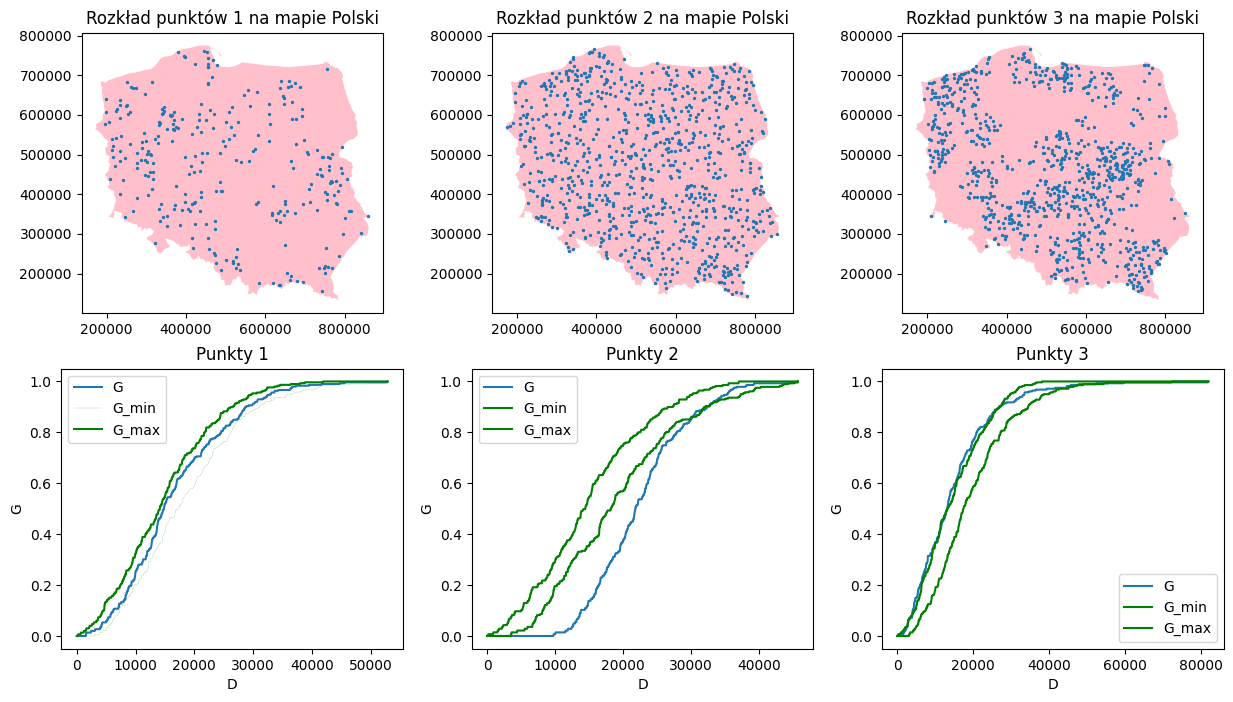

In [20]:
# YOUR CODE HERE
f, a = plt.subplots(2, 3, figsize = (15,8))

sns.lineplot(data = g1, x = 'D', y = 'G', ax = a[1,0], legend = True, label = 'G')
a[1, 0].set_title('Punkty 1')

sns.lineplot(data = g2, x = 'D', y = 'G', ax = a[1,1], legend = True, label = 'G')
a[1, 1].set_title('Punkty 2')

sns.lineplot(data = g3, x = 'D', y = 'G', ax = a[1,2], legend = True, label = 'G')
a[1, 2].set_title('Punkty 3')

sns.lineplot(data = g1, x = 'D', y = 'G_min', ax = a[1,0], legend = True, label = 'G_min', color = 'green')
sns.lineplot(data = g1, x = 'D', y = 'G_max', ax = a[1,0], legend = True, label = 'G_max', color = 'green')

sns.lineplot(data = g2, x = 'D', y = 'G_min', ax = a[1,1], legend = True, label = 'G_min', color = 'green')
sns.lineplot(data = g2, x = 'D', y = 'G_max', ax = a[1,1], legend = True, label = 'G_max', color = 'green')

sns.lineplot(data = g3, x = 'D', y = 'G_min', ax = a[1,2], legend = True, label = 'G_min', color = 'green')
sns.lineplot(data = g3, x = 'D', y = 'G_max', ax = a[1,2], legend = True, label = 'G_max', color = 'green')

polska.plot(ax = a[0,0], color = 'pink')
punkty3.plot(ax = a[0,0], markersize = 2)
a[0,0].set_title('Rozkład punktów 1 na mapie Polski')

polska.plot(ax = a[0,1], color = 'pink')
punkty4.plot(ax = a[0,1], markersize = 2)
a[0,1].set_title('Rozkład punktów 2 na mapie Polski')

polska.plot(ax = a[0,2], color = 'pink')
punkty5.plot(ax = a[0,2], markersize = 2)
a[0,2].set_title('Rozkład punktów 3 na mapie Polski')

#raise NotImplementedError()

### Zadanie 2: Autokorelacja przestrzenna danych (25 pkt)

Przygotuj funkcję `spatial_autocorelation_data()`, która będzie przygotowywać dane niezbędne do oceny autokorelacji przestrzennej analizowanych danych.

Schemat postępowania:
- zagreguj dane na obszarze poszczegolnych powiatów (ze względu na różnice w powierzchni obszarów skorzystaj z wyliczonych dla nich wartości intensywności, a nie samej liczby zliczeń w ich obrębie),
- wyznacz macierz wag przestrzennych,
- wylicz opóźnienie przestrzenne,
- przygotuj dane niezbędne do wykonania wykresu Morana.

Następnie wykorzystaj przygotowane funkcje do oceny autokorelacji przestrzennej rozkładów punktów z plików points_4.zip i points_5.zip.
Przedstaw wyniki analizy graficznie w postaci kartogramów intensywności i opóźnienia przestrzennego z nałożonymi na nie rozkładami punktów oraz za pomocą wykresów Morana. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3).

Przydatne klasy i funkcje:
- `libpysal.weights.Queen()`
- `libpysal.weights.Rook()`
- `libpysal.spatial_lag.lag_spatial()`

#### a) Przygotowanie funkcji

In [21]:
def spatial_autocorelation_data(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    moran_plot_data: GeoDataFrame
        Obiekt GeoDataFrame zawierający następujące kolumny:
        "geometry" - kolumna z geometrią podobszarów,
        "intensity" - wartości intesywności procesu w obrębie poszczególnych podobszarów,
        "lag" - wartości opóźnienia przestrzennego w obrębie poszczególnych podobszarów,
        "intensity_std" - ustandaryzowane wartości intensywności.
        "lag_std" - ustandaryzowane wartości opóźnienia przestrzennego.
    """
    # YOUR CODE HERE
    intensywnosci = intensity_on_subregions(points, subregions)
    intensywnosci_mean = np.mean(intensywnosci)
    ms = ps.weights.Queen(list(subregions['geometry']))
    lag = ps.weights.lag_spatial(ms, intensywnosci)
    mean_lag = np.mean(lag)
    lag_std = lag - mean_lag
    intensity_std = intensywnosci - intensywnosci_mean
    moran_plot_data = gpd.GeoDataFrame({"geometry": subregions['geometry'], "intensity": intensywnosci, "lag": lag, "intensity_std": intensity_std, "lag_std": lag_std})
    return moran_plot_data
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [22]:
# YOUR CODE HERE
moran_4 = spatial_autocorelation_data(punkty4, powiaty)
moran_5 = spatial_autocorelation_data(punkty5, powiaty)
#raise NotImplementedError()

#### c) Wizualizacja

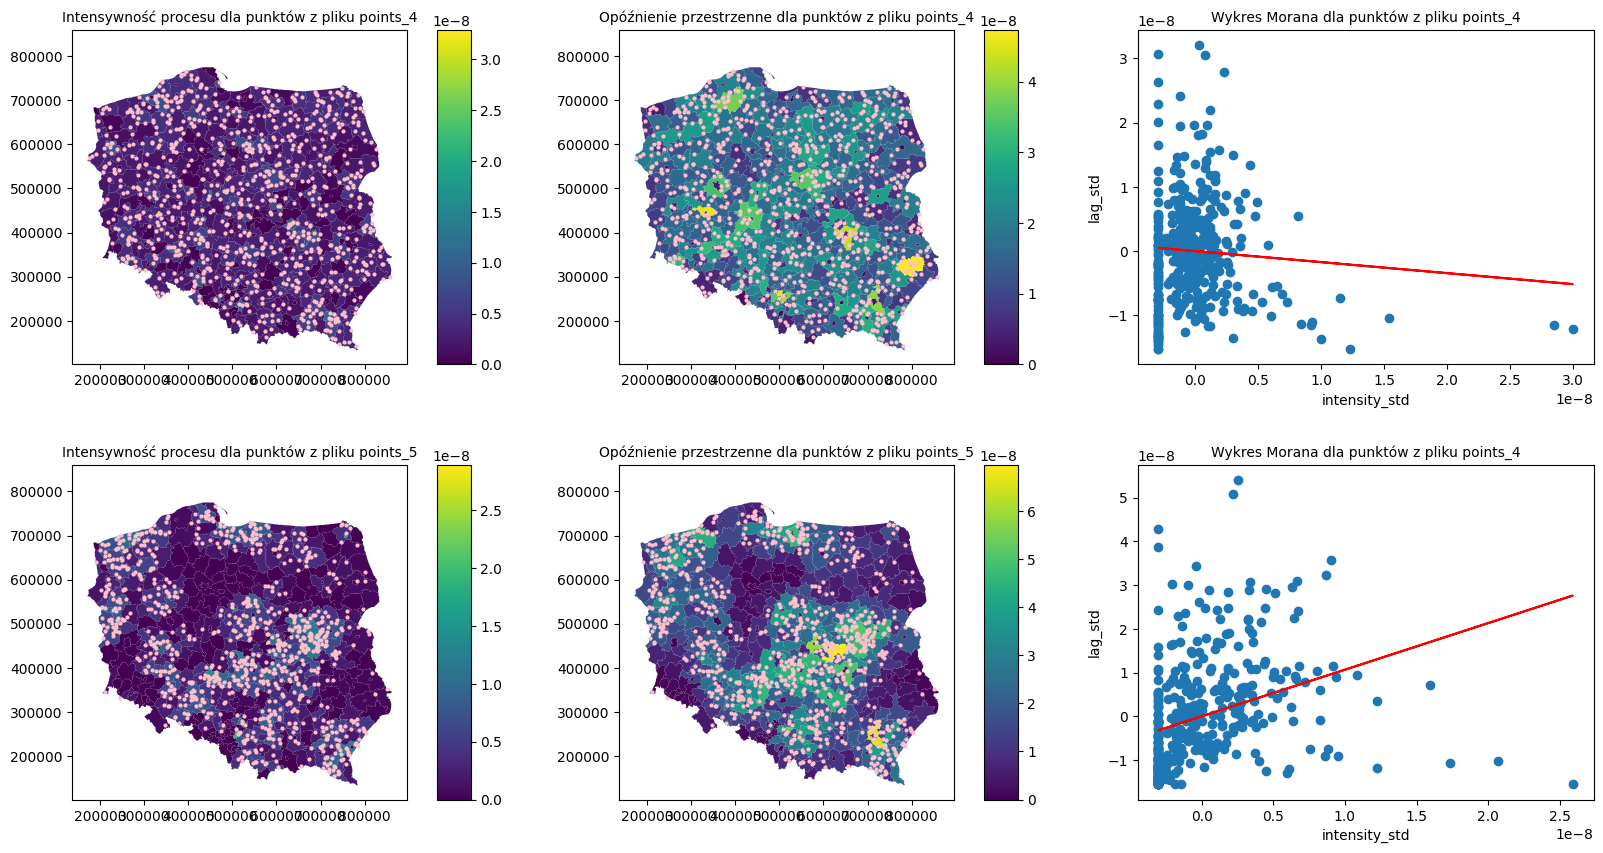

In [23]:
# YOUR CODE HERE
m1, b1=np.polyfit(moran_4["intensity_std"], moran_4["lag_std"], 1)
m2, b2=np.polyfit(moran_5["intensity_std"], moran_5["lag_std"], 1)

fig, axs=plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace=0.3)

ca = make_axes_locatable(axs[0, 0]).append_axes("right", size = "10%", pad = 0.3)
moran_4.plot(ax = axs[0, 0], column = 'intensity', legend  = True, cax = ca)
ca = make_axes_locatable(axs[0, 1]).append_axes("right", size = "10%", pad = 0.3)
moran_4.plot(ax = axs[0, 1], column = 'lag', legend  = True, cax = ca)
punkty4.plot(ax = axs[0,0], color = 'pink', markersize = 4, legend  = True)
punkty4.plot(ax = axs[0,1], color = 'pink', markersize = 4, legend  = True)
axs[0, 2].plot(moran_4["intensity_std"], m1*moran_4["intensity_std"]+b1, color="red")
axs[0, 2].scatter(moran_4["intensity_std"], moran_4["lag_std"])
axs[0, 0].axis("square") 
axs[0, 1].axis("square")
axs[0, 0].set_title("Intensywność procesu dla punktów z pliku points_4", size=10)
axs[0, 1].set_title("Opóźnienie przestrzenne dla punktów z pliku points_4", size=10)
axs[0, 2].set_title("Wykres Morana dla punktów z pliku points_4", size=10)
axs[0, 2].set_xlabel("intensity_std")
axs[0, 2].set_ylabel("lag_std")


ca = make_axes_locatable(axs[1, 0]).append_axes("right", size = "10%", pad = 0.3)
moran_5.plot(ax = axs[1, 0], column = 'intensity', legend  = True, cax = ca)
ca = make_axes_locatable(axs[1, 1]).append_axes("right", size = "10%", pad = 0.3)
moran_5.plot(ax = axs[1, 1], column = 'lag', legend  = True, cax = ca)
punkty5.plot(ax = axs[1,0], color = 'pink', markersize = 4, legend  = True)
punkty5.plot(ax = axs[1,1], color = 'pink', markersize = 4, legend  = True)
axs[1, 2].plot(moran_5["intensity_std"], m2*moran_5["intensity_std"]+b2, color="red")
axs[1, 2].scatter(moran_5["intensity_std"], moran_5["lag_std"])
axs[1, 0].axis("square") 
axs[1, 1].axis("square") 
axs[1, 0].set_title("Intensywność procesu dla punktów z pliku points_5", size=10)
axs[1, 1].set_title("Opóźnienie przestrzenne dla punktów z pliku points_5", size=10)
axs[1, 2].set_title("Wykres Morana dla punktów z pliku points_4", size=10)
axs[1, 2].set_xlabel("intensity_std")
axs[1, 2].set_ylabel("lag_std")


plt.show()
#raise NotImplementedError()